## Calibration executer

Auteurs : Léa Drolet-Roy

Création : 2025-04-04
Dernière modification :

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import glob

import pyswarms as ps
from pyswarms.utils.plotters import plot_cost_history

from caleabration.calibration import Calibration
from caleabration.charuco import Charucoboard
from caleabration.checkerboard import Checkerboard

np.set_printoptions(precision=4, suppress=True)

In [2]:
CHECKERBOARD = (9,4)
square_size = 112
marker_size = 86

""" CHECKERBOARD = (22,16)
square_size = 18
marker_size = 13 """

image_size = (1080,1920)

aruco_name = cv2.aruco.DICT_4X4_1000

# create Charurco board object
Board = Charucoboard(CHECKERBOARD, square_size, marker_size, aruco_name)

# validate board creation
# Board.create_and_save_new_board()

# create Calibration object
Calib = Calibration(Board, image_size)


cams = ['M11139', 'M11140', 'M11141', 'M11458', 'M11459', 'M11461', 'M11462', 'M11463']
#cams = ['c11140', 'c11141', 'c11458', 'c11459', 'c11461', 'c11462', 'c11463']
time_threshold = 15

path = '/media/lea/store/Images/CalibrationAtrium1'
calib_dir = os.path.join(path, 'corners_found')

### Save images with detections

Appuyez sur 'Y' pour garder, 'N' pour ignorer, ou 'Q' pour quitter.
Coverage for cam M11139: 7.28%
Coverage for cam M11140: 8.65%
Coverage for cam M11141: 28.04%
Coverage for cam M11458: 10.51%
Coverage for cam M11459: 7.96%
Coverage for cam M11461: 18.56%
Coverage for cam M11462: 15.22%
Coverage for cam M11463: 35.48%
Saved 4255 valid frames.


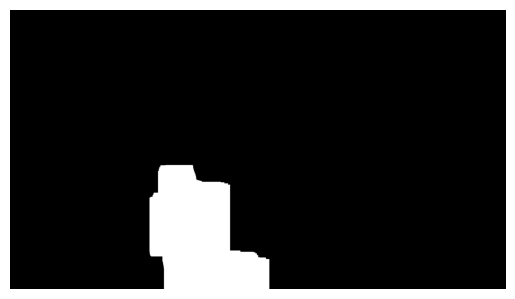

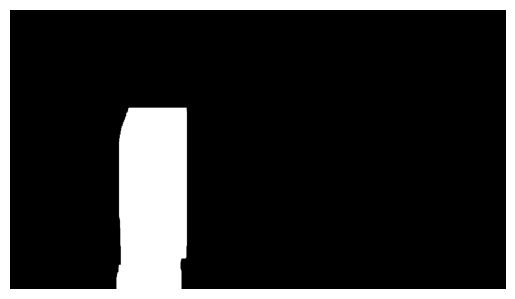

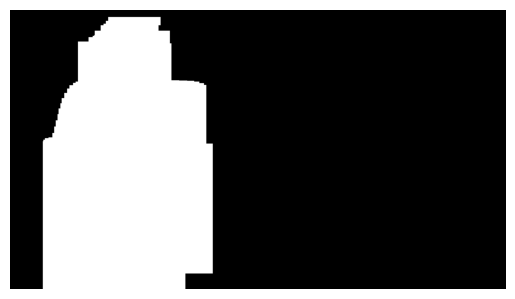

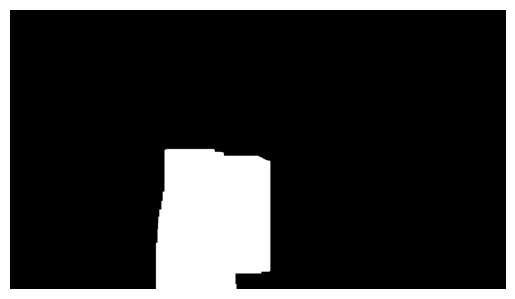

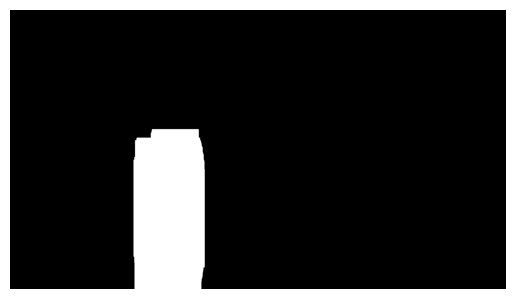

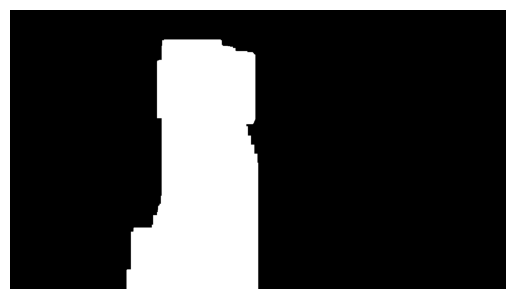

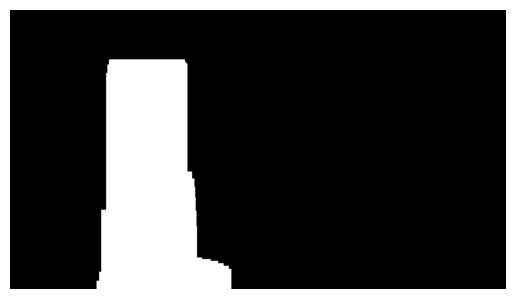

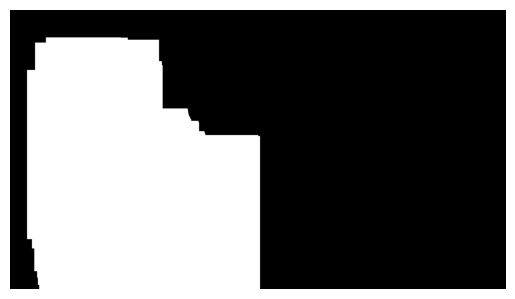

In [ ]:
valid_frame_count, total_area_covered, mask_covered = Calib.saveImagesBoard(path, 'png', True)

for mask in mask_covered:
    plt.imshow(mask, cmap='gray')
    plt.axis('off')
    plt.show()
    plt.close()

### Intrinsic calibration

In [3]:
# Try setting an initial camera matrix
h, w = image_size
focal_length = 2000  # Approximate focal length
camera_matrix_init = np.array([
    [focal_length, 0, w / 2],
    [0, focal_length, h / 2],
    [0, 0, 1]], dtype=np.float32)

ret, C, S, D, K = Board.calibrate_intrinsics(calib_dir, cams, image_size, camera_matrix_init)

D = np.array(D)
np.savez('Intrinsics_D_atrium.npz', D)

D = np.array(D)
np.savez('Intrinsics_D_atrium.npz', D)


Calibration completed for camera: M11139
Error: 44.4174
Camera Matrix:
 [[2597.4821    0.      958.4854]
 [   0.     1981.8887  549.7668]
 [   0.        0.        1.    ]]
Distortion Coefficients:
 [[  -3.7341 -110.3969    0.6138    0.8736   49.2372]]

Calibration completed for camera: M11140
Error: 66.5475
Camera Matrix:
 [[2176.4568    0.      954.3642]
 [   0.     1403.909   541.8748]
 [   0.        0.        1.    ]]
Distortion Coefficients:
 [[ -0.2712  16.8733   0.0124   0.8479 -25.1196]]

Calibration completed for camera: M11141
Error: 77.2090
Camera Matrix:
 [[3151.5431    0.     1017.2607]
 [   0.     2127.5922  583.1867]
 [   0.        0.        1.    ]]
Distortion Coefficients:
 [[ 0.657   1.6787 -0.1126  0.5694 -1.4394]]

Calibration completed for camera: M11458
Error: 34.8845
Camera Matrix:
 [[2213.57      0.     1027.5204]
 [   0.     2465.2029  692.7019]
 [   0.        0.        1.    ]]
Distortion Coefficients:
 [[   5.6439   44.1639   -0.1563    1.0588 -363.6696]]

Ca

In [4]:
K = np.load('Intrinsics_K_atrium.npz')['arr_0']
D = np.load('Intrinsics_D_atrium.npz')['arr_0']

K = np.array([K[0], K[1], K[2], K[0], K[3], K[4], K[5], K[6]])
D = np.array([D[0], D[1], D[2], D[0], D[3], D[4], D[5], D[6]])

print(f'Intrinsics: \n{K[0]} \n{K[1]} \n{K[2]} \n{K[3]} \n{K[4]} \n{K[5]} \n{K[6]} \n{K[7]}')

Intrinsics: 
[[2603.1336    0.      958.7199]
 [   0.     1991.3905  549.8992]
 [   0.        0.        1.    ]] 
[[2190.7485    0.      951.4507]
 [   0.     1546.0965  545.8081]
 [   0.        0.        1.    ]] 
[[3341.0359    0.     1035.4579]
 [   0.     2224.6288  594.3732]
 [   0.        0.        1.    ]] 
[[2603.1336    0.      958.7199]
 [   0.     1991.3905  549.8992]
 [   0.        0.        1.    ]] 
[[2570.3858    0.     1051.6944]
 [   0.     2843.2249  699.7342]
 [   0.        0.        1.    ]] 
[[2474.2522    0.      962.3196]
 [   0.     1723.5171  547.2721]
 [   0.        0.        1.    ]] 
[[2126.5872    0.      828.5206]
 [   0.     1379.3187  709.9612]
 [   0.        0.        1.    ]] 
[[1867.0725    0.      871.1645]
 [   0.     1247.0569  521.9016]
 [   0.        0.        1.    ]]


In [ ]:
Calib.saveStereoData(path, cams)

M11139 M11140 0
M11139 M11141 293
M11139 M11458 50
M11139 M11459 0
M11139 M11461 0
M11139 M11462 54
M11139 M11463 50
M11140 M11141 0
M11140 M11458 21
M11140 M11459 364
M11140 M11461 366
M11140 M11462 0
M11140 M11463 0
M11141 M11458 50
M11141 M11459 0
M11141 M11461 0
M11141 M11462 53
M11141 M11463 50
M11458 M11459 0
M11458 M11461 50
M11458 M11462 0
M11458 M11463 59
M11459 M11461 50
M11459 M11462 0
M11459 M11463 0
M11461 M11462 0
M11461 M11463 76
M11462 M11463 37


In [ ]:
with open('stereo_data.pkl', 'rb') as f:
    stereo_images = pickle.load(f)

In [ ]:
for camL in cams:
    
    Left_Params = {}
    Left_Params['Intrinsic'] = K[cams.index(camL)]
    Left_Params['Distortion'] = D[cams.index(camL)]

    for camR in cams[cams.index(camL)+1:]:
        print(camL, camR)

        Left_corners = [stereo_images['Charuco_Corners'][i] for i in range(0, len(stereo_images['Corners']), 2) if stereo_images['Camera'][i] == camL and stereo_images['Camera'][i+1] == camR]
        Right_corners = [stereo_images['Charuco_Corners'][i] for i in range(1, len(stereo_images['Corners']), 2) if stereo_images['Camera'][i-1] == camL and stereo_images['Camera'][i] == camR]
        
        Left_ids = [stereo_images['Ids'][i] for i in range(0, len(stereo_images['Corners']), 2) if stereo_images['Camera'][i] == camL and stereo_images['Camera'][i+1] == camR]
        Right_ids = [stereo_images['Ids'][i] for i in range(1, len(stereo_images['Corners']), 2) if stereo_images['Camera'][i-1] == camL and stereo_images['Camera'][i] == camR]
        
        Right_Params = {}
        
        if len(Left_corners) >= 1 and len(Right_corners) >= 1:

            Right_Params['Intrinsic'] = K[cams.index(camR)]
            Right_Params['Distortion'] = D[cams.index(camR)]
            
            ret, Stereo_Params = Calib.StereoCalibration(Left_Params, Right_Params, Left_corners, Left_ids, Right_corners, Right_ids)
            if ret:
                print('Transformation Matrix:')
                print(Stereo_Params['Transformation'])

                Calib.SaveParameters(camL, camR, Stereo_Params, Left_Params, Right_Params)
            else:
                    print('Not enough corners', '\n')
        else:
            print('Not enough images', '\n')

M11139 M11140
Not enough images 

M11139 M11141
Transformation Matrix:
[[   0.9886    0.104     0.1092 -377.36  ]
 [  -0.0793    0.9744   -0.2103  162.7037]
 [  -0.1283    0.1992    0.9715 -547.3234]
 [   0.        0.        0.        1.    ]]
M11139 M11458
Transformation Matrix:
[[    0.9083    -0.082      0.4103 -1255.4083]
 [    0.0819     0.9965     0.0178  -214.5349]
 [   -0.4103     0.0174     0.9118   -99.2998]
 [    0.         0.         0.         1.    ]]
M11139 M11459
Not enough images 

M11139 M11461
Not enough images 

M11139 M11462
Transformation Matrix:
[[   0.9948    0.102    -0.004   779.825 ]
 [  -0.102     0.9921   -0.0733 -117.2212]
 [  -0.0036    0.0733    0.9973 -355.426 ]
 [   0.        0.        0.        1.    ]]
M11139 M11463
Transformation Matrix:
[[   0.9589    0.0115    0.2835 -785.274 ]
 [   0.0337    0.9875   -0.1541 -132.8615]
 [  -0.2817    0.1573    0.9465 -663.049 ]
 [   0.        0.        0.        1.    ]]
M11140 M11141
Not enough images 

M11140 M

In [ ]:
c1_c3 = np.load('M11139_M11141_parameters.npz')['Transformation']
c1_c4 = np.load('M11139_M11458_parameters.npz')['Transformation']
c1_c7 = np.load('M11139_M11462_parameters.npz')['Transformation']
c1_c8 = np.load('M11139_M11463_parameters.npz')['Transformation']
c2_c4 = np.load('M11140_M11458_parameters.npz')['Transformation']
c2_c5 = np.load('M11140_M11459_parameters.npz')['Transformation']

c3_c4 = np.load('M11141_M11458_parameters.npz')['Transformation']
c3_c7 = np.load('M11141_M11462_parameters.npz')['Transformation']
c3_c8 = np.load('M11141_M11463_parameters.npz')['Transformation']
c4_c6 = np.load('M11458_M11461_parameters.npz')['Transformation']
c4_c8 = np.load('M11458_M11463_parameters.npz')['Transformation']
c5_c6 = np.load('M11459_M11461_parameters.npz')['Transformation']
c6_c8 = np.load('M11461_M11463_parameters.npz')['Transformation']
c7_c8 = np.load('M11462_M11463_parameters.npz')['Transformation']

Tcam1 = np.eye((4))
Tcam3 = c1_c3
Tcam4 = c1_c4
Tcam7 = c1_c7
Tcam8 = c1_c8

Tcam2 = Tcam4 @ np.linalg.inv(c2_c4)
Tcam5 = Tcam2 @ c2_c5
Tcam6 = Tcam4 @ c4_c6

projMat = [Tcam1, Tcam2, Tcam3, Tcam4, Tcam5, Tcam6, Tcam7, Tcam8]

for mat in projMat:
    print(mat)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[   -0.0895     0.0085     0.996  -1828.4805]
 [    0.0401     0.9992    -0.0049  -404.7963]
 [   -0.9952     0.0395    -0.0897  3831.1418]
 [    0.         0.         0.         1.    ]]
[[   0.9886    0.104     0.1092 -377.36  ]
 [  -0.0793    0.9744   -0.2103  162.7037]
 [  -0.1283    0.1992    0.9715 -547.3234]
 [   0.        0.        0.        1.    ]]
[[    0.9083    -0.082      0.4103 -1255.4083]
 [    0.0819     0.9965     0.0178  -214.5349]
 [   -0.4103     0.0174     0.9118   -99.2998]
 [    0.         0.         0.         1.    ]]
[[   0.8614   -0.1237   -0.4926 1308.6756]
 [   0.0715    0.9898   -0.1235  -44.3811]
 [   0.5028    0.0712    0.8615 2426.6602]
 [   0.        0.        0.        1.    ]]
[[    0.8565    -0.2813     0.4328 -1128.6787]
 [    0.2927     0.9553     0.0417    -0.3601]
 [   -0.4252     0.091      0.9005  5112.4115]
 [    0.         0.         0.         1.    ]]
[[   0.9948    0.102    -0

In [ ]:
## PSO for extrinsic parameters (with Bundle adjustment)
# Constants
num_cameras = 8
num_params_per_cam = 6
total_params = num_cameras * num_params_per_cam
n_particles = 60  # Number of particles
options = {'c1': 1.5, 'c2': 1.5, 'w': 0.7} #{'c1': 2.05, 'c2': 2.05, 'w': 0.729} # PSO Hyperparameters

init_params = []
for mat in projMat:
    rvec, _ = cv2.Rodrigues(mat[0:3,0:3])
    rvec = rvec.squeeze()
    params = [rvec[0], rvec[1], rvec[2], mat[0,3], mat[1,3], mat[2,3]]
    init_params.extend(params)

init_params = np.array(init_params, dtype=np.float64)
init_pos = np.tile(init_params, (n_particles,1))
print(init_params.shape)
print(init_pos.shape)

# Define parameter bounds
lower_bounds = [-2*np.pi, -2*np.pi, -2*np.pi, -15000, -15000, -15000]
upper_bounds = [2*np.pi, 2*np.pi, 2*np.pi, 15000, 15000, 15000]

param_bounds = (np.tile(lower_bounds, num_cameras), np.tile(upper_bounds, num_cameras))
print(param_bounds[0].shape)

print(np.all(param_bounds[0] <= init_pos[0]))
print(np.all(init_pos[0] <= param_bounds[1]))

(48,)
(60, 48)
(48,)
True
True


In [ ]:
board = Board.type

def fun(params):
    errors = np.empty((n_particles,))
    params = np.array(params)

    for n in range(n_particles):
        projMat = np.empty((num_cameras+1, 3, 4))
        projMat[0] = np.hstack((np.eye((3)), np.zeros((3,1))))

        for cam_idx in range(num_cameras):
            cam_params = params[n][cam_idx * num_params_per_cam : (cam_idx + 1) * num_params_per_cam]
            r1, r2, r3, t1, t2, t3 = cam_params
            rvec = np.array([r1, r2, r3])
            R, _ = cv2.Rodrigues(rvec)
            t = np.array([t1, t2, t3]).reshape((3,1))
            projMat[cam_idx+1] = np.hstack((R, t))  #[cam_idx+1]

        RMSE = {c:[] for c in range(8)}
        # Loop on stereo images checkerboard points
        for i in range(0, len(stereo_images['Camera']) - 1, 2):
            j = i+1 # stereo image is the next one

            pts1_im = stereo_images['Charuco_Corners'][i].squeeze()
            pts2_im = stereo_images['Charuco_Corners'][j].squeeze()

            c1 = cams.index(stereo_images['Camera'][i])
            c2 = cams.index(stereo_images['Camera'][j])

            undist_pts1 = cv2.undistortPoints(pts1_im, K[c1], D[c1]).reshape(-1, 2)  # Shape (2, N)
            undist_pts2 = cv2.undistortPoints(pts2_im, K[c2], D[c2]).reshape(-1, 2)  # Shape (2, N)

            if board == 'charuco':
                Lids = stereo_images['Ids'][i].squeeze()
                Rids = stereo_images['Ids'][j].squeeze()

                obj_pts, img_pts_l, img_pts_r, common_ids = Board.getObjectImagePoints(undist_pts1, Lids, undist_pts2, Rids)
                img_pts_l, img_pts_r = img_pts_l.squeeze(), img_pts_r.squeeze()

                ids_to_keepL = [list(Lids).index(t) for t in common_ids]
                ids_to_keepR = [list(Rids).index(t) for t in common_ids]
                pts1_im, pts2_im = pts1_im[ids_to_keepL], pts2_im[ids_to_keepR]

            elif board == 'checker':
                img_pts_l, img_pts_r = undist_pts1, undist_pts2

            # Perform triangulation
            pts_4d = cv2.triangulatePoints(projMat[c1], projMat[c2], img_pts_l.T, img_pts_r.T)
            points_3d = pts_4d[:3, :] / pts_4d[3, :]  # Shape (3, N)
            points_3d = points_3d.T  # Shape (N, 3)

            # Compute RMSE for both cameras
            rmse1 = Calib.compute_rmse(pts1_im, points_3d, projMat[c1], K[c1], D[c1])
            rmse2 = Calib.compute_rmse(pts2_im, points_3d, projMat[c2], K[c2], D[c2])

            RMSE[c1].append(rmse1)
            RMSE[c2].append(rmse2)

        # Per-camera mean RMSE
        rmse_mean = []
        for _, rmse in RMSE.items():
            rmse_mean.append(np.mean(rmse))

        errors[n] = np.mean(rmse_mean) #+ np.max(RMSE)   # OPTIONAL: add max error to cost function
    
    return errors

In [ ]:
# Run PSO to optimize calibration parameters
optimizer = ps.single.GlobalBestPSO(n_particles=n_particles, dimensions=total_params, options=options, bounds=param_bounds, init_pos=init_pos)
best_error, best_params = optimizer.optimize(fun, iters = 500)
print(f"Best Reprojection Error: {best_error} pixels")

# Extract optimized parameters for each camera
optimized_params = np.split(best_params, num_cameras)

plot_cost_history(cost_history=optimizer.cost_history)
plt.show()

2025-04-08 13:43:19,274 - pyswarms.single.global_best - INFO - Optimize for 500 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.7}
pyswarms.single.global_best:   0%|          |1/500, best_cost=6.23e+12/home/lea/trampo/.venv/lib/python3.12/site-packages/numpy/linalg/linalg.py:2582: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real
/home/lea/trampo/.venv/lib/python3.12/site-packages/numpy/linalg/linalg.py:2583: RuntimeWarning: overflow encountered in reduce
  return sqrt(add.reduce(s, axis=axis, keepdims=keepdims))
pyswarms.single.global_best:   4%|▍         |19/500, best_cost=178    /home/lea/trampo/.venv/lib/python3.12/site-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
pyswarms.single.global_best:  54%|█████▍    |272/500, best_cost=101


KeyboardInterrupt: 

In [ ]:
extrinsics = []
extrinsics.append(np.hstack((np.eye((3)), np.zeros((3,1)))))

for cam_idx in range(num_cameras):
    r1, r2, r3, t1, t2, t3 = optimized_params[cam_idx]
    rvec = np.array([r1,r2,r3], dtype=np.float64)
    R, _ = cv2.Rodrigues(rvec)
    t = np.array([t1,t2,t3], dtype=np.float64).reshape((3,1))

    optimized_camera_matrix = np.hstack((R,t))
    extrinsics.append(optimized_camera_matrix)

for cam_idx, cam_mat in enumerate(extrinsics):
    print(f"Camera {cam_idx+1} Optimized Camera Matrix:\n", cam_mat)

np.savez('Extrinsics_optimized_1.npz', extrinsics[1:])

Camera 1 Optimized Camera Matrix:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
Camera 2 Optimized Camera Matrix:
 [[  -0.5715   -0.3143    0.758  -632.7989]
 [   0.2801    0.7935    0.5402 -657.2509]
 [  -0.7713    0.521    -0.3655 2344.2767]]
Camera 3 Optimized Camera Matrix:
 [[    0.0897    -0.3282     0.9403 -1435.8987]
 [    0.3494     0.8945     0.2789  -220.5955]
 [   -0.9327     0.3036     0.1949  1939.3818]]
Camera 4 Optimized Camera Matrix:
 [[   0.45      0.4362   -0.7793  806.1666]
 [  -0.2658    0.8985    0.3495 -220.7843]
 [   0.8526    0.0499    0.5202  169.7508]]
Camera 5 Optimized Camera Matrix:
 [[    0.3538    -0.4938     0.7944 -1873.4689]
 [    0.4325     0.8394     0.3292  -752.8458]
 [   -0.8294     0.2271     0.5105  1182.9457]]
Camera 6 Optimized Camera Matrix:
 [[   0.8861   -0.1544   -0.437  -112.1726]
 [   0.0701    0.9767   -0.2029  255.2391]
 [   0.4582    0.1492    0.8762  141.9347]]
